In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
train_data = pd.read_csv('/content/drive/My Drive/heart_disease/train_values.csv')
train_labels = pd.read_csv('/content/drive/My Drive/heart_disease/train_labels.csv')
test_data = pd.read_csv('/content/drive/My Drive/heart_disease/test_values.csv')
print(train_data.dtypes)

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object


In [0]:
index = train_data['patient_id']
train_data = train_data.drop(columns=['patient_id'])

In [0]:
train_data['thal'] = train_data['thal'].astype('category')
train_data.dtypes

slope_of_peak_exercise_st_segment          int64
thal                                    category
resting_blood_pressure                     int64
chest_pain_type                            int64
num_major_vessels                          int64
fasting_blood_sugar_gt_120_mg_per_dl       int64
resting_ekg_results                        int64
serum_cholesterol_mg_per_dl                int64
oldpeak_eq_st_depression                 float64
sex                                        int64
age                                        int64
max_heart_rate_achieved                    int64
exercise_induced_angina                    int64
dtype: object

In [0]:
train_data['thal_cat'] = train_data['thal'].cat.codes
train_data = train_data.drop(columns=['thal'])
train_data.dtypes

slope_of_peak_exercise_st_segment         int64
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
thal_cat                                   int8
dtype: object

In [0]:
train_labels = train_labels.drop(columns=['patient_id'])

resting_blood_pressure


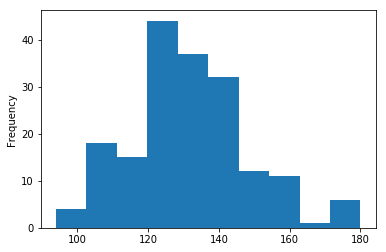

In [0]:
plt.figure()
train_data.iloc[:, 1].plot(kind='hist')
print(train_data.columns[1])
train_data['log_serum_cholesterol_mg_per_dl'] = np.log(1 + train_data.serum_cholesterol_mg_per_dl)

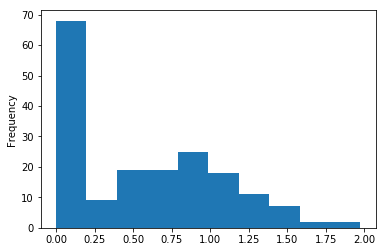

In [0]:
plt.figure()
train_data['log_oldpeak_eq_st_depression'].plot(kind='hist')

# serum_cholesterol_mg_per_dl
# resting_blood_pressure
# oldpeak_eq_st_depression

In [0]:
train_data = train_data.drop(columns=['serum_cholesterol_mg_per_dl', 'resting_blood_pressure', 'oldpeak_eq_st_depression'])

In [0]:
x = train_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_data_scaled = pd.DataFrame(x_scaled, index=train_data.index)

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_data_scaled))
print(z)

[[0.89124111 1.23477477 0.71840267 ... 1.11468025 0.13850548 1.13611963]
 [0.72919727 0.16621968 0.71840267 ... 0.77262589 1.33627624 0.64036503]
 [0.89124111 0.90233541 2.38509686 ... 1.11468025 0.32604693 1.07230243]
 ...
 [0.72919727 0.16621968 0.71840267 ... 0.9190024  0.32604693 1.15194485]
 [0.89124111 0.16621968 1.35059702 ... 1.11468025 0.38955438 0.21451178]
 [0.89124111 0.16621968 0.31609717 ... 1.11468025 1.6276143  0.94584874]]


In [0]:
w = (np.where(z>3))
print(w)
for i in range(len(w[0])):
  train_data_scaled=train_data_scaled.drop(train_data_scaled.index[w[0][i]])
  train_labels=train_labels.drop(train_labels.index[w[0][i]])

(array([36, 60]), array([12, 12]))


In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(train_data, train_labels)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(train_data[['max_heart_rate_achieved', 'num_major_vessels', 'oldpeak_eq_st_depression', 'exercise_induced_angina', 'serum_cholesterol_mg_per_dl']], train_labels, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(train_data_scaled, train_labels, test_size=0.2, random_state=42)

In [0]:
clftree = tree.DecisionTreeClassifier()
clftree = clftree.fit(X_train, y_train)

In [0]:
clftree.score(X_test, y_test)

0.7777777777777778

In [0]:
clfnb = GaussianNB()
clfnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
clfnb.score(X_test, y_test)

0.8333333333333334

In [0]:
clfnn = Sequential()
clfnn.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=13))
clfnn.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
clfnn.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
clfnn.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
clfnn.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
clfnn.fit(X_train, y_train, batch_size=10, epochs=100)

In [0]:
clfnn.evaluate(X_test, y_test)

In [0]:
clflog = LogisticRegression(random_state=42, solver='sag')
clflog.fit(X_train, y_train)
clflog.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7777777777777778

In [0]:
scoressvr = []
best_svr = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(train_data_scaled):
    X_tr, X_te, y_tr, y_te = train_data_scaled.iloc[train_index], train_data_scaled.iloc[test_index], train_labels.iloc[train_index], train_labels.iloc[test_index]
    best_svr.fit(X_tr, y_tr)
    scoressvr.append(best_svr.score(X_te, y_te))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConv

In [0]:
np.mean(scoressvr)

0.8205882352941177

In [0]:
index = test_data['patient_id']
test_data = test_data.drop(columns=['patient_id'])
test_data['thal'] = test_data['thal'].astype('category')
test_data['thal_cat'] = test_data['thal'].cat.codes
test_data = test_data.drop(columns=['thal'])
test_data['log_oldpeak_eq_st_depression'] = np.log(1 + test_data.oldpeak_eq_st_depression)
test_data['log_resting_blood_pressure'] = np.log(1 + test_data.resting_blood_pressure)
test_data['log_serum_cholesterol_mg_per_dl'] = np.log(1 + test_data.serum_cholesterol_mg_per_dl)
test_data = test_data.drop(columns=['oldpeak_eq_st_depression'])
test_data = test_data.drop(columns=['resting_blood_pressure'])
test_data = test_data.drop(columns=['serum_cholesterol_mg_per_dl'])

In [0]:
x = test_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_data_scaled = pd.DataFrame(x_scaled, index=test_data.index)

In [0]:
import csv

with open('/content/drive/My Drive/heart_disease/submission.csv', mode='w') as csv_file:
    fieldnames = ['patient_id', 'heart_disease_present']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    probs = best_svr.predict_proba(test_data_scaled)
    for ind in index.iteritems():
      writer.writerow({'patient_id': ind[1], 'heart_disease_present': 1-probs[ind[0]][0] if (probs[ind[0]][0]>probs[ind[0]][1]) else probs[ind[0]][1]})

In [0]:
seed = 42
max_tree = []
kfold = KFold(n_splits=10, random_state=seed)
for num_trees in range(10, 50+1):
  modelada = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
  modelada.fit(X_train, y_train)
  max_tree.append(modelada.score(X_test, y_test))

In [0]:
m = max(max_tree)
max_tree.index(m)

In [0]:
modelada = AdaBoostClassifier(n_estimators=10, random_state=seed)
modelada.fit(X_train, y_train)
modelada.score(X_test, y_test)

In [0]:
clfrf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clfrf.fit(X_train, y_train)
clfrf.score(X_test, y_test)

In [0]:
estimators = []
model1 = tree.DecisionTreeClassifier()
estimators.append(('tree', model1))
model2 = GaussianNB()
estimators.append(('nb', model2))
model3 = LogisticRegression(random_state=42, solver='sag')
estimators.append(('logistic', model3))
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_data_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])